## 1. Data Loading and Preprocessing

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.preprocessing import image
from keras.layers import Dense, InputLayer, Conv2D, MaxPool2D, Flatten
    
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
# To stop potential randomness
seed = 42
rng = np.random.RandomState(seed)

In [3]:
data = pd.read_csv('../datasets/emergency_classification/emergency_classification.csv')

In [4]:
# load images and store it in numpy array
X = []
for img_name in data.image_names:
    img = plt.imread('../datasets/emergency_classification/images/' + img_name)
    X.append(img)
    
X=np.array(X)

# create target
y = data.emergency_or_not.values

In [5]:
X.shape

(2352, 224, 224, 3)

In [6]:
X = X / X.max()

In [7]:
X_train, X_valid, Y_train, Y_valid=train_test_split(X,y,test_size=0.3, random_state=42)

## 3. Model Building

In [8]:
model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 220, 220, 25)      1900      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 216, 216, 50)      31300     
_________________________________________________________________
flatten_1 (Flatten)          (None, 2332800)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               233280100 
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 233,313,401
Trainable params: 233,313,401
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [11]:
model.fit(X_train, Y_train, epochs=10, validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 14s 9ms/step - loss: 0.6668 - acc: 0.6215 - val_loss: 0.6187 - val_acc: 0.6601
Epoch 2/10
1646/1646 [==============================] - 10s 6ms/step - loss: 0.5907 - acc: 0.7029 - val_loss: 0.5816 - val_acc: 0.6799
Epoch 3/10
1646/1646 [==============================] - 10s 6ms/step - loss: 0.5667 - acc: 0.7145 - val_loss: 0.5453 - val_acc: 0.6997
Epoch 4/10
1646/1646 [==============================] - 10s 6ms/step - loss: 0.5355 - acc: 0.7467 - val_loss: 0.5511 - val_acc: 0.7153
Epoch 5/10
1646/1646 [==============================] - 10s 6ms/step - loss: 0.4965 - acc: 0.7667 - val_loss: 0.5228 - val_acc: 0.7365
Epoch 6/10
1646/1646 [==============================] - 10s 6ms/step - loss: 0.4681 - acc: 0.7813 - val_loss: 0.6048 - val_acc: 0.6615
Epoch 7/10
1646/1646 [==============================] - 10s 6ms/step - loss: 0.4509 - acc: 0.8013 - val_loss: 0.4976 - val_acc: 0.7408
Epoch 8/

In [15]:
model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))
model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 220, 220, 25)      1900      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 216, 216, 50)      31300     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 50)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 145800)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               14580100  
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 14,613,401
Trainable params: 14,613,401
Non-trainable params: 0
________________________________________________________________

In [17]:
model.fit(X_train, Y_train, epochs=10,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 8s 5ms/step - loss: 0.6626 - acc: 0.6063 - val_loss: 0.6410 - val_acc: 0.6006
Epoch 2/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.6123 - acc: 0.6786 - val_loss: 0.5967 - val_acc: 0.6686
Epoch 3/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.5861 - acc: 0.6914 - val_loss: 0.5898 - val_acc: 0.6629
Epoch 4/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.5541 - acc: 0.7290 - val_loss: 0.5467 - val_acc: 0.7266
Epoch 5/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.5384 - acc: 0.7290 - val_loss: 0.6321 - val_acc: 0.6601
Epoch 6/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.5153 - acc: 0.7527 - val_loss: 0.5108 - val_acc: 0.7465
Epoch 7/10
 288/1646 [====>.........................] - ETA: 4s - loss: 0.4984 - acc: 0.7778

KeyboardInterrupt: 

17 % sure that it is emergency
Whereas actual class is  0


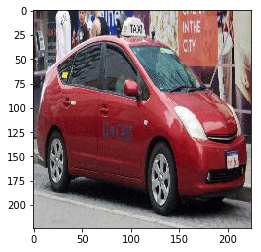

In [16]:
# get predictions
predictions = model.predict_classes(X_valid)[:, 0]
prediction_probabilities = model.predict(X_valid)[:, 0]

# pull out the original images from the data
# which correspond to the validation data
_, valid_vehicles, _, valid_y = train_test_split(data.image_names.values, y, test_size=0.3, random_state=seed)

# get a random index to plot image randomly
index = rng.choice(range(len(valid_vehicles)))

# get the corresponding image name and probability
img_name = valid_vehicles[index]
prob = (prediction_probabilities * 100).astype(int)[index]

# read the image
img = plt.imread('../datasets/emergency_classification/images/' + img_name)

# print probability and actual class
print('There is', prob , '% chance that it is an emergency vehicle')
print('Whereas actual class is ', valid_y[index])

# plot image
plt.imshow(img)

32 % sure that it is emergency
Whereas actual class is  1


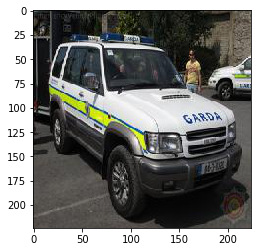

In [20]:
incorrect_indices = np.where(predictions != valid_y)[0]

index = rng.choice(incorrect_indices)
img_name = valid_vehicles[index]


prob = (prediction_probabilities * 100).astype(int)[index]

img = plt.imread('../datasets/emergency_classification/images/' + img_name)

print(prob , '% sure that it is emergency')
print('Whereas actual class is ', valid_y[index])

plt.imshow(img)

## 4. Hyperparameter Tuning

In [ ]:
# increase number of convolutional layers
# increase number of convolutional kernels
# change padding technique
# change stride                            # change epoch to 50

In [18]:
# increase number of layers

model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Conv2D(100, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 220, 220, 25)      1900      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 216, 216, 50)      31300     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 50)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 50, 50, 100)       125100    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 100)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 14400)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               1440100   
__________

In [20]:
model.fit(X_train, Y_train, epochs=10,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 10s 6ms/step - loss: 0.6807 - acc: 0.5741 - val_loss: 0.6862 - val_acc: 0.5609
Epoch 2/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.6714 - acc: 0.5863 - val_loss: 0.6934 - val_acc: 0.5609
Epoch 3/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.6677 - acc: 0.5863 - val_loss: 0.6703 - val_acc: 0.5609
Epoch 4/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.6590 - acc: 0.5923 - val_loss: 0.6664 - val_acc: 0.5609
Epoch 5/10
1646/1646 [==============================] - 7s 5ms/step - loss: 0.6457 - acc: 0.6318 - val_loss: 0.6403 - val_acc: 0.6955
Epoch 6/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.6271 - acc: 0.6762 - val_loss: 0.6421 - val_acc: 0.5977
Epoch 7/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.6160 - acc: 0.6902 - val_loss: 0.5984 - val_acc: 0.6969
Epoch 8/10
164

In [21]:
# increase number of layers 

model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(125, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(150, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Conv2D(200, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 220, 220, 125)     9500      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 216, 216, 150)     468900    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 150)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 50, 50, 200)       750200    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 200)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              29492224  
__________

In [23]:
model.fit(X_train, Y_train, epochs=10,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 48s 29ms/step - loss: 0.6829 - acc: 0.5802 - val_loss: 0.6853 - val_acc: 0.5609
Epoch 2/10
1646/1646 [==============================] - 40s 24ms/step - loss: 0.6818 - acc: 0.5729 - val_loss: 0.6839 - val_acc: 0.5609
Epoch 3/10
1646/1646 [==============================] - 40s 24ms/step - loss: 0.6802 - acc: 0.5869 - val_loss: 0.6836 - val_acc: 0.5609
Epoch 4/10
1646/1646 [==============================] - 40s 24ms/step - loss: 0.6743 - acc: 0.5863 - val_loss: 0.6819 - val_acc: 0.5609
Epoch 5/10
1646/1646 [==============================] - 40s 24ms/step - loss: 0.6804 - acc: 0.5687 - val_loss: 0.6802 - val_acc: 0.5609
Epoch 6/10
1646/1646 [==============================] - 40s 24ms/step - loss: 0.6722 - acc: 0.5936 - val_loss: 0.6980 - val_acc: 0.5609
Epoch 7/10
1646/1646 [==============================] - 40s 24ms/step - loss: 0.6740 - acc: 0.5863 - val_loss: 0.6751 - val_acc: 0.5609
E

In [24]:
# change padding

model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='same'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Conv2D(100, (5, 5), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 224, 224, 25)      1900      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 224, 224, 50)      31300     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 56, 56, 50)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 56, 56, 100)       125100    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 100)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 19600)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               1960100   
__________

In [26]:
model.fit(X_train, Y_train, epochs=10,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 9s 6ms/step - loss: 0.6789 - acc: 0.5863 - val_loss: 0.6870 - val_acc: 0.5609
Epoch 2/10
1646/1646 [==============================] - 8s 5ms/step - loss: 0.6770 - acc: 0.5863 - val_loss: 0.6827 - val_acc: 0.5609
Epoch 3/10
1646/1646 [==============================] - 8s 5ms/step - loss: 0.6748 - acc: 0.5863 - val_loss: 0.6830 - val_acc: 0.5609
Epoch 4/10
1646/1646 [==============================] - 8s 5ms/step - loss: 0.6721 - acc: 0.5863 - val_loss: 0.6762 - val_acc: 0.5609
Epoch 5/10
1646/1646 [==============================] - 8s 5ms/step - loss: 0.6692 - acc: 0.5863 - val_loss: 0.6714 - val_acc: 0.5609
Epoch 6/10
1646/1646 [==============================] - 8s 5ms/step - loss: 0.6638 - acc: 0.5917 - val_loss: 0.6643 - val_acc: 0.5652
Epoch 7/10
1646/1646 [==============================] - 8s 5ms/step - loss: 0.6570 - acc: 0.6002 - val_loss: 0.6626 - val_acc: 0.5609
Epoch 8/10
1646

In [77]:
# change padding

model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(25, (5, 5), activation='relu', strides=(2, 2), padding='same'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Conv2D(100, (5, 5), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

In [78]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_122 (Conv2D)          (None, 112, 112, 25)      1900      
_________________________________________________________________
conv2d_123 (Conv2D)          (None, 56, 56, 50)        31300     
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 14, 14, 50)        0         
_________________________________________________________________
conv2d_124 (Conv2D)          (None, 7, 7, 100)         125100    
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 1, 1, 100)         0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 100)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 100)               10100     
__________

In [79]:
model.fit(X_train, Y_train, epochs=15,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/50
1646/1646 [==============================] - 4s 3ms/step - loss: 0.6649 - acc: 0.6124 - val_loss: 0.6604 - val_acc: 0.6062
Epoch 2/50
1646/1646 [==============================] - 4s 2ms/step - loss: 0.6080 - acc: 0.6883 - val_loss: 0.5874 - val_acc: 0.7025
Epoch 3/50
1646/1646 [==============================] - 4s 2ms/step - loss: 0.5640 - acc: 0.7290 - val_loss: 0.5810 - val_acc: 0.7167
Epoch 4/50
1646/1646 [==============================] - 3s 2ms/step - loss: 0.5109 - acc: 0.7552 - val_loss: 0.4892 - val_acc: 0.7748
Epoch 5/50
1646/1646 [==============================] - 3s 2ms/step - loss: 0.4541 - acc: 0.7819 - val_loss: 0.4559 - val_acc: 0.7861
Epoch 6/50
1646/1646 [==============================] - 3s 2ms/step - loss: 0.3817 - acc: 0.8317 - val_loss: 0.3992 - val_acc: 0.8173
Epoch 7/50
1646/1646 [==============================] - 3s 2ms/step - loss: 0.3434 - acc: 0.8512 - val_loss: 0.4538 - val_acc: 0.7904
Epoch 8/50
1646

KeyboardInterrupt: 

In [34]:
# VGG equivalent

model = Sequential()
model.add(InputLayer(input_shape=(224,224,3)))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 128, kernel_size = (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 256, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 256, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 256, kernel_size = (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 256, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 256, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 256, kernel_size = (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 512, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 512, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 512, kernel_size = (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units = 1024, activation ='relu'))
model.add(Dense(units=1, activation = 'sigmoid'))


model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 56, 56, 256)       295168    
__________

In [16]:
model.fit(X_train, Y_train, epochs=200, batch_size=64,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/200
1646/1646 [==============================] - 18s 11ms/step - loss: 0.6887 - acc: 0.5808 - val_loss: 0.6877 - val_acc: 0.5609
Epoch 2/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.6825 - acc: 0.5863 - val_loss: 0.6858 - val_acc: 0.5609
Epoch 3/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.6801 - acc: 0.5863 - val_loss: 0.6856 - val_acc: 0.5609
Epoch 4/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.6786 - acc: 0.5863 - val_loss: 0.6856 - val_acc: 0.5609
Epoch 5/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.6788 - acc: 0.5863 - val_loss: 0.6860 - val_acc: 0.5609
Epoch 6/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.6779 - acc: 0.5863 - val_loss: 0.6863 - val_acc: 0.5609
Epoch 7/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.6779 - acc: 0.5863 - val_loss: 0.6864 - val_acc: 0

1646/1646 [==============================] - 17s 10ms/step - loss: 0.4187 - acc: 0.8098 - val_loss: 0.4399 - val_acc: 0.8074
Epoch 61/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.4224 - acc: 0.8038 - val_loss: 0.4503 - val_acc: 0.7833
Epoch 62/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.4162 - acc: 0.8135 - val_loss: 0.4449 - val_acc: 0.7960
Epoch 63/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.4092 - acc: 0.8135 - val_loss: 0.4485 - val_acc: 0.7890
Epoch 64/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.3924 - acc: 0.8354 - val_loss: 0.4474 - val_acc: 0.7904
Epoch 65/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.3940 - acc: 0.8214 - val_loss: 0.4430 - val_acc: 0.8031
Epoch 66/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.3863 - acc: 0.8214 - val_loss: 0.4506 - val_acc: 0.7946
Epoch 67/200
1646/1646 [=======================

KeyboardInterrupt: 

## 5. Comparison with Pre-trained model

![](images/pretrained_result.png)